# 1. Regresión

Revisaremos los conceptos de regresión vistos en el teórico.

Haremos pruebas con datos de entrada de **una dimensión**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
np.set_printoptions(suppress=True)  # no usar notacion "e"

## Función Verdadera Oculta

Usaremos como función oculta un sinusoide.

In [37]:
def create_sinusoidal_data(spread=0.25, data_size=50):
    np.random.seed(0)
    x = np.linspace(0, 1, data_size)
    y = np.sin(2 * np.pi * x) + np.random.normal(scale=spread, size=x.shape)

    return x, y

# vamos a inventar unos puntos

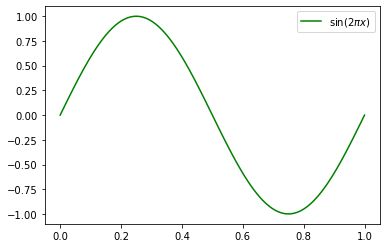

In [4]:
x, f_x = create_sinusoidal_data(0, 100)
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

## Muestra Ruidosa

Tomaremos puntos uniformes en $x$, ruidosos en $y$.

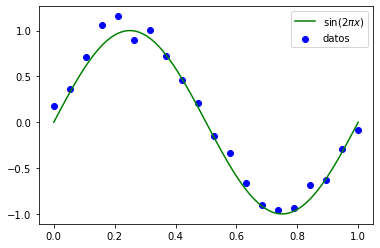

In [40]:
data_size = 20
X, y = create_sinusoidal_data(0.10, data_size) # 0.1 de ruido

#los datos que genero los guardo en dos vectores X e Y

plt.scatter(X, y, color="blue", label="datos")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

## División en Entrenamiento y Evaluación

Dividiremos aleatoriamente los datos en una parte para entrenamiento y otra para evaluación.

Usaremos 
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de scikit-learn:

In [41]:
from sklearn.model_selection import train_test_split # division de los datos en entrenamiento y test.

train_size = 5 # 5 para entrenar y 15 para evaluar.
test_size = data_size - train_size
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=0)

In [7]:
X_train.shape, X_test.shape

((5,), (15,))

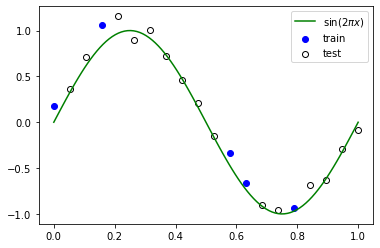

In [8]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_test, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

## Regresión Lineal

Probaremos ajustar los puntos usando una recta.

Vamos a programar a mano el aprendizaje y la predicción.

### Solución de Cuadrados Mínimos

Datos de entrenamiento:
- $X \in R^{N \times K}:$ $N$ vectores de entrada, de $K$ dimensiones cada uno.
- $y \in R^N:$ $N$ valores de salida.

Aprendizaje:

$$w^* = (X^\top X)^{-1} X^\top y$$

Predicción:

$$f_{w^*}(x) = x^\top w^* = \sum_{k=1}^K x_k w^*_k$$

Con $K=1$ tendríamos:

$$f_{w^*}(x) = x_1 w_1^*$$

Para que sea una recta nos falta un $w_0$ ("bias").
Esto se puede resolver haciendo $K=2$ y agregando un valor constante 1 a cada dato:

$$f_{w^*}((1, x)) = w_0 + x_1 w_1^*$$


- Vector W son los coeficientes.

In [9]:
X_train

array([0.57894737, 0.15789474, 0.        , 0.78947368, 0.63157895])

In [43]:
X_train.shape

(5,)

In [45]:
X_train_bias = np.stack((np.ones(X_train.shape[0]), X_train), axis=1)  # add bias
X_train_bias

array([[1.        , 0.57894737],
       [1.        , 0.15789474],
       [1.        , 0.        ],
       [1.        , 0.78947368],
       [1.        , 0.63157895]])

In [44]:
X_train_bias.shape

(5, 2)

In [47]:
def linear_least_squares(X, y): #definido el algoritmo de aprendizaje
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias #stackear= apilar dos vectores
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)  # producto punto

### Entrenar

In [12]:
X_train, y_train

(array([0.57894737, 0.15789474, 0.        , 0.78947368, 0.63157895]),
 array([-0.33052004,  1.0612558 ,  0.17640523, -0.93603283, -0.65962014]))

In [13]:
w = linear_least_squares(X_train, y_train)

In [14]:
w  # qué dimensiones tiene w?

array([-1.95626346,  0.70657973])

tiene 2 dimensiones

### Graficar

Graficaremos la función aprendida a partir de los datos de entrenamiento. También graficaremos con los datos de evaluación y la función oculta, para comparar.

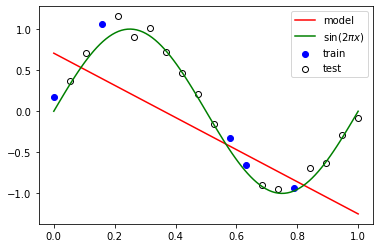

In [15]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_test, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, f(x, w), color="red", label="model")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

### Predecir y Evaluar: Error Cuadrático Medio

Obtendremos los valores predichos para los datos de entrenamiento y de evaluación.
Calcularemos el error cuadrático medio sobre ambos conjuntos de datos.

In [48]:
y_train_pred = f(X_train, w) # aplicamos la f a los datos de entrenamiento
y_test_pred = f(X_test, w) # aplicamos la f a los datos de evaluacion

Usamos la función [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) de scikit-learn:

In [17]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 0.151445
Test error: 0.381363


incluso para el entrenamiento hay error

## Regresión Polinomial

Ahora haremos regresión polinomial. En este caso usaremos scikit-learn para definir el modelo, entrenar y predecir.

En scikit-learn cada dato de entrada debe ser un vector, no un número. Debemos convertir cada dato en un vector de una dimensión:

In [66]:
X_train.shape, X_test.shape

((5,), (15,))

cada entrada en esa dimension es un dato. 

In [67]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
X_train.shape, X_test.shape

((5, 1), (15, 1))

convierto en matrices de 5x1 y 15x1

### Features Polinomiales

En scikit-learn, la regresión polinomial se implementa como un modelo de dos pasos.

El primer paso genera vectores de características polinomiales, y el segundo paso aplica una regresión lineal sobre estos vectores (ver [Polynomial interpolation](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html)).

Por ejemplo, para generar características polinomiales de grado 5:

a partir de un solo valor de x genero varios valores de 

In [68]:
from sklearn.preprocessing import PolynomialFeatures  # permite generar features polimoniales a partir de datos de entradas

pf = PolynomialFeatures(5)  # polinomio de grado 5
pf.fit(X_train)             # no necesita y_train!

PolynomialFeatures(degree=5)

In [21]:
X_train2 = pf.transform(X_train)

In [22]:
X_train2.shape

(5, 6)

esta matriz tiene forma 5 filas y 6 columnas, 

In [52]:
X_train[0]

0.5789473684210527

In [23]:
X_train2

array([[1.        , 0.57894737, 0.33518006, 0.19405161, 0.11234567,
        0.06504223],
       [1.        , 0.15789474, 0.02493075, 0.00393643, 0.00062154,
        0.00009814],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.        , 0.78947368, 0.6232687 , 0.49205424, 0.38846387,
        0.306682  ],
       [1.        , 0.63157895, 0.39889197, 0.25193177, 0.1591148 ,
        0.10049356]])

### Instanciar y Entrenar

Crearemos y entrenaremos un modelo de grado 2.

Como siempre en scikit-learn, para entrenar usamos la función **fit**.

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline # permite secuenciar 

degree = 2
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # false= el bias ya esta como feature
model = make_pipeline(pf, lr) # juntamos todo

In [70]:
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [ ]:
# equivalente a:
Z_train = pf.fit(X_train)
lr.fit(Z_train, y_train)

### Inspeccionar Parámetros

Ver [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [71]:
lr.coef_ 

array([ 0.45340784,  1.62753594, -4.67896686])

In [72]:
lr.intercept_

0.0

### Graficar Resultado

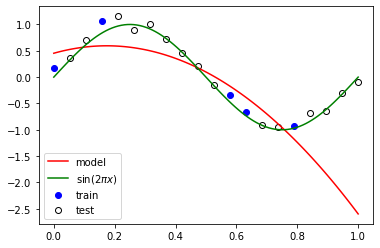

In [28]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_test, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

### Predecir y Evaluar

Para predecir, usamos la función **predict**:

In [29]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [30]:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')

Train error: 0.091
Test error: 0.87


aumentamos el grado del polimonio. en el entrenamiento mejoro y en el test empeoro

## Sobreajuste vs. Generalización

Probaremos polinomios de varios grados, obteniendo valores de error en entrenamiento y evaluación:

In [73]:
train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] #pruebo grados de polinomio. en casa caso entreno
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

Graficaremos las curvas de error en términos del grado del polinomio.

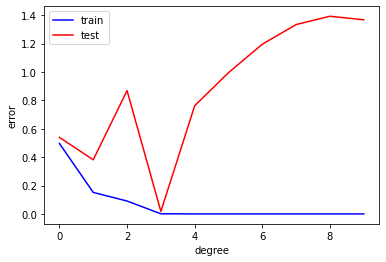

In [32]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Se puede ver que el error en entrenamiento siempre baja, pero que en algún punto comienza el sobreajuste, ya que el error en evaluación empieza a subir.

a partir de 4 comienza el overfitting, 

### Mejor Modelo

De acuerdo a la gráfica anterior, y como era de esperarse, el modelo que mejor ajusta los datos es el de grado 3:

In [33]:
degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train);

Graficamos:

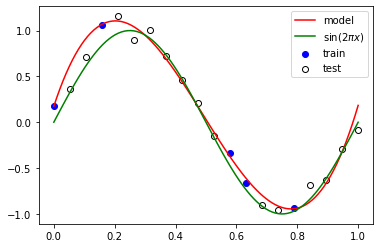

In [34]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_test, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

### Modelo Sobreajustado

Veamos cómo es la gráfica de uno de los modelos que sufre de sobreajuste:

In [35]:
degree = 8
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train);

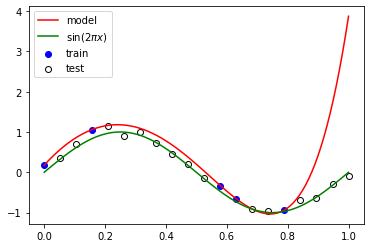

In [36]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_test, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

## Ejercicios

1. Probar agregando puntos a los datos de entrenamiento para prevenir el sobreajuste en polinomios de grado alto.
2. Imprimir los parámetros de los modelos para cada grado.
3. Probar usando regularización para prevenir el sobreajuste en polinomios de grado alto
(ver [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)).
4. Hicimos todo con datos de entrada de una dimensión. ¿Cómo serían los features polinomiales en datos de 2 o más dimensiones?

## Referencias

Scikit-learn:

- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
- [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
